In [1]:
import numpy as np
import matplotlib.pyplot as plt
import FDTD_1D

In [2]:
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x-x0)**2 / (2 * sigma))

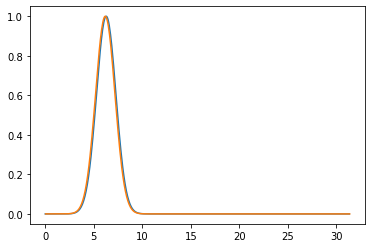

In [28]:
x = np.linspace(0, 10 * np.pi, 500, endpoint=False)
x1 = np.linspace(np.pi / 100, np.pi * 999 / 100, 500)
dx = 0.3
dt = 0.1
k = 1
omega = 1
# E_0 = np.sin(k*x + omega * dt / 2) # t = -dt / 2
# B_0 = np.sin(k*x)
E_0 = gaussian(x, 1, 2*np.pi, 1)
B_0 = gaussian(x1, 1, 2*np.pi - dt * omega / k, 1)

plt.plot(x, E_0)
plt.plot(x1, B_0)
plt.show()

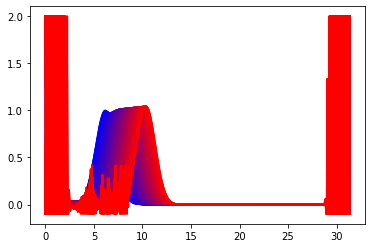

In [33]:
step = 200
E_history, B_history = FDTD_1D.field_evolve_vacuum(E_0, B_0, dx, dt, step)
E_history_c = np.clip(E_history, -0.1, 2)
B_history_c = np.clip(B_history, -0.1, 2)
# for i, E in enumerate(E_history_c):
#     plt.plot(x, E, c=(i / step, 0, 1 - i / step))
for i, B in enumerate(B_history_c):
    plt.plot(x, B, c=(i / step, 0, 1 - i / step))
plt.show()